In [1]:
# -*- coding: utf-8 -*-
%matplotlib inline
import numpy as np
import cv2
import glob
import re
from matplotlib import pyplot as plt
import time as t
print "OpenCV version: {}".format(cv2.__version__)
# https://wiki.python.org/moin/PythonSpeed/PerformanceTips

OpenCV version: 2.4.11


In [9]:
img_w = 658
img_h = 492
RESOLUTION = (img_w, img_h)
grid_w = 7
grid_h = 7
GRID_SIZE = (grid_w, grid_h)
sq_size = 3 # cm
crit = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

objp = np.zeros((grid_w*grid_h,3), np.float32)
objp[:,:2] = np.mgrid[0:grid_w,0:grid_h].T.reshape(-1,2) * sq_size

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size

In [4]:
imagesL = glob.glob('img-3/L*.ppm')
# goodImages = []

objpoints = []
imgpoints1 = []

for fname in imagesL:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, GRID_SIZE)
        
    if ret is True:
        objpoints.append(objp)
        cv2.cornerSubPix(gray, corners, (11,11), (-1,-1), crit)
        imgpoints1.append(corners)
        cv2.drawChessboardCorners(img, GRID_SIZE, corners, ret)
        # goodImages.append(fname)
              
retL, mtxL, distL, rvecsL, tvecsL = cv2.calibrateCamera(objpoints, imgpoints1, RESOLUTION)
print mtxL
print distL

[[  1.10312974e+03   0.00000000e+00   3.40807265e+02]
 [  0.00000000e+00   1.10560667e+03   2.66314161e+02]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]
[[ -8.37940859e-02  -2.23883467e-01   3.49277614e-03  -5.22711070e-03
    3.70694288e+00]]


In [5]:
imagesR = glob.glob('img-4/L*.ppm')
# goodImages = []

objpoints = []
imgpoints2 = []

for fname in imagesR:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, GRID_SIZE)
        
    if ret is True:
        objpoints.append(objp)
        cv2.cornerSubPix(gray, corners, (11,11), (-1,-1), crit)
        imgpoints2.append(corners)
        cv2.drawChessboardCorners(img, GRID_SIZE, corners, ret)
        # goodImages.append(fname)
              
retR, mtxR, distR, rvecsR, tvecsR = cv2.calibrateCamera(objpoints, imgpoints2, RESOLUTION)
print mtxR
print distR

[[  1.10025601e+03   0.00000000e+00   3.25734138e+02]
 [  0.00000000e+00   1.09917887e+03   2.01883907e+02]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]
[[-0.10684196  0.23600111 -0.0105042  -0.00653689 -3.47787549]]


In [ ]:
imagesL = glob.glob('img-3/L*.ppm')
imagesR = glob.glob('img-4/L*.ppm')

ret, _, _, _, _, R, T, E, F  = cv2.stereoCalibrate(objpoints, imgpoints1, imgpoints2, RESOLUTION)
R1, R2, P1, P2, Q, _, _ = cv2.stereoRectify(mtxL, distL, mtxR, distR, RESOLUTION, R, T, flags=cv2.CALIB_ZERO_DISPARITY)

map1L, map2L = cv2.initUndistortRectifyMap(mtxL, distL, R1, mtxL, RESOLUTION, cv2.CV_16SC2)
map1R, map2R = cv2.initUndistortRectifyMap(mtxR, distR, R2, mtxR, RESOLUTION, cv2.CV_16SC2)

for fnameL, fnameR in zip(imagesL, imagesR):
    # name = re.findall(r'[\w\d\-]+\.\w+',fname)[0]
    time = t.clock()
    imgL = cv2.imread(fnameL)
    imgR = cv2.imread(fnameR)    
    imgL = cv2.remap(imgL, map1L, map2L, cv2.INTER_CUBIC)
    imgR = cv2.remap(imgR, map1R, map2R, cv2.INTER_CUBIC)
    imgL = cv2.cvtColor(imgL, cv2.COLOR_BGR2GRAY)
    imgR = cv2.cvtColor(imgR, cv2.COLOR_BGR2GRAY)
    # cv2.imwrite('stereo-example2/img-rectified/rectL'+name, dstL)
    # cv2.imwrite('stereo-example2/img-rectified/rectR'+name, dstR)
    plt.subplot(1,2,1), plt.imshow(imgL, 'gray')
    plt.subplot(1,2,2), plt.imshow(imgR, 'gray')
    plt.show()
    print t.clock() - time

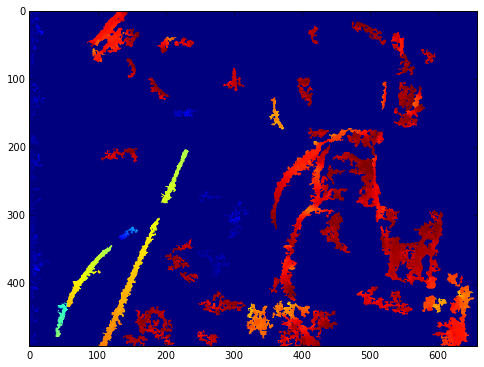

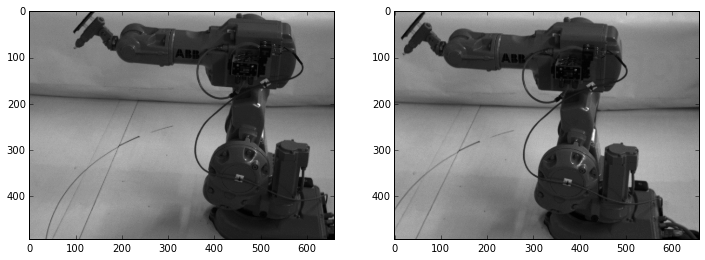

In [15]:
from IPython.html import widgets
from IPython.display import display

# M = img_w / 8
M = 80
# P1 = 8*number_of_image_channels*SADWindowSize*SADWindowSize
# P2 = 32*number_of_image_channels*SADWindowSize*SADWindowSize

def stereoSGBM(mindisp=0, sadw=1, disp12=0, pfiltc=0, unqrat=5, spckw=0, spckr=1):
    imgL = cv2.imread('img-3/I-0000000000.ppm')
    imgR = cv2.imread('img-4/D-0000000000.ppm')
    # imgL = cv2.remap(imgL, map1L, map2L, cv2.INTER_LINEAR)
    # imgR = cv2.remap(imgR, map1R, map2R, cv2.INTER_LINEAR)
    grayL = cv2.cvtColor(imgL,cv2.COLOR_BGR2GRAY)
    grayR = cv2.cvtColor(imgR,cv2.COLOR_BGR2GRAY)
    numdisp = M - mindisp
    stereo = cv2.StereoSGBM(mindisp, M-mindisp, sadw, 8*sadw*sadw, 32*sadw*sadw, disp12, pfiltc, unqrat, spckw, spckr)
    disparity = stereo.compute(imgL,imgR)
    plt.imshow(disparity)
    plt.show()
    plt.subplot(1,2,1),plt.imshow(grayL, 'gray')
    plt.subplot(1,2,2),plt.imshow(grayR, 'gray')
    # plt.subplot(2,2,3),plt.imshow(dstL, 'gray')
    # plt.subplot(2,2,4),plt.imshow(dstR, 'gray')
    # plt.show()
    
mindisp_slider = widgets.IntSliderWidget(min=0, max=M-16, step=16, value=16, description='minDisparity')
sadw_slider = widgets.IntSliderWidget(min=1, max=21, step=2, value=1, description='SADWindowSize')
disp12_slider = widgets.IntSliderWidget(min=-1, max=5, step=1, value=1, description='disp12MaxDiff')
pfiltc_slider = widgets.IntSliderWidget(min=0, max=63, step=1, value=54, description='preFilterCap')
unqrat_slider = widgets.IntSliderWidget(min=5, max=15, step=1, value=145, description='uniquenessRatio')
spckw_slider = widgets.IntSliderWidget(min=50, max=200, step=1, value=160, description='speckleWindowSize')
spckr_slider = widgets.IntSliderWidget(min=1, max=2, step=1, value=2, description='speckleRange')

w = widgets.interactive(stereoSGBM, mindisp=mindisp_slider, sadw=sadw_slider, disp12=disp12_slider,
                        pfiltc=pfiltc_slider, unqrat=unqrat_slider, spckw=spckw_slider, spckr=spckr_slider)
display(w)

In [21]:
nms = dir(cv2) # list of everything in the cv2 module
[m for m in nms if 'CV' in m]

['COLOR_COLORCVT_MAX',
 'CV_16S',
 'CV_16SC1',
 'CV_16SC2',
 'CV_16SC3',
 'CV_16SC4',
 'CV_16U',
 'CV_16UC1',
 'CV_16UC2',
 'CV_16UC3',
 'CV_16UC4',
 'CV_32F',
 'CV_32FC1',
 'CV_32FC2',
 'CV_32FC3',
 'CV_32FC4',
 'CV_32S',
 'CV_32SC1',
 'CV_32SC2',
 'CV_32SC3',
 'CV_32SC4',
 'CV_64F',
 'CV_64FC1',
 'CV_64FC2',
 'CV_64FC3',
 'CV_64FC4',
 'CV_8S',
 'CV_8SC1',
 'CV_8SC2',
 'CV_8SC3',
 'CV_8SC4',
 'CV_8U',
 'CV_8UC1',
 'CV_8UC2',
 'CV_8UC3',
 'CV_8UC4',
 'CV_AA',
 'CV_EPNP',
 'CV_HIST_ARRAY',
 'CV_HIST_SPARSE',
 'CV_ITERATIVE',
 'CV_LOAD_IMAGE_COLOR',
 'CV_LOAD_IMAGE_GRAYSCALE',
 'CV_LOAD_IMAGE_UNCHANGED',
 'CV_NEXT_AROUND_DST',
 'CV_NEXT_AROUND_LEFT',
 'CV_NEXT_AROUND_ORG',
 'CV_NEXT_AROUND_RIGHT',
 'CV_P3P',
 'CV_PREV_AROUND_DST',
 'CV_PREV_AROUND_LEFT',
 'CV_PREV_AROUND_ORG',
 'CV_PREV_AROUND_RIGHT',
 'CV_PTLOC_INSIDE',
 'CV_PTLOC_ON_EDGE',
 'CV_PTLOC_OUTSIDE_RECT',
 'CV_PTLOC_VERTEX',
 'CV_ROW_SAMPLE',
 'CV_VAR_CATEGORICAL',
 'CV_VAR_NUMERICAL',
 'CV_VAR_ORDERED',
 'CV_WINDOW_AUTOSIZE'

In [28]:
help(cv2.StereoSGBM)

Help on built-in function StereoSGBM in module cv2:

StereoSGBM(...)
    StereoSGBM([minDisparity, numDisparities, SADWindowSize[, P1[, P2[, disp12MaxDiff[, preFilterCap[, uniquenessRatio[, speckleWindowSize[, speckleRange[, fullDP]]]]]]]]]) -> <StereoSGBM object>

